In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the time module.
import time

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"


In [8]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [9]:
city_weather.status_code

200

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | saskylakh
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | ponta do sol
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | quelimane
Processing Record 12 of Set 1 | pacasmayo
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 15 of Set 1 | laguna
Processing Record 16 of Set 1 | general roca
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | puerto colombia
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | hasaki
Processing Record 22 of Set 1 | costinesti

Processing Record 37 of Set 4 | novokruchininskiy
Processing Record 38 of Set 4 | malwan
City not found. Skipping...
Processing Record 39 of Set 4 | galveston
Processing Record 40 of Set 4 | saldanha
Processing Record 41 of Set 4 | ribeira grande
Processing Record 42 of Set 4 | kieta
Processing Record 43 of Set 4 | samarai
Processing Record 44 of Set 4 | clyde river
Processing Record 45 of Set 4 | etchojoa
Processing Record 46 of Set 4 | margate
Processing Record 47 of Set 4 | piryetos
City not found. Skipping...
Processing Record 48 of Set 4 | gao
Processing Record 49 of Set 4 | kungurtug
Processing Record 50 of Set 4 | karratha
Processing Record 1 of Set 5 | port hardy
Processing Record 2 of Set 5 | kano
Processing Record 3 of Set 5 | mogadishu
Processing Record 4 of Set 5 | taoudenni
Processing Record 5 of Set 5 | kaitangata
Processing Record 6 of Set 5 | guerrero negro
Processing Record 7 of Set 5 | the valley
Processing Record 8 of Set 5 | beringovskiy
Processing Record 9 of Set 5

Processing Record 22 of Set 8 | debre tabor
Processing Record 23 of Set 8 | abha
Processing Record 24 of Set 8 | angoche
Processing Record 25 of Set 8 | agadez
Processing Record 26 of Set 8 | beian
Processing Record 27 of Set 8 | gazojak
Processing Record 28 of Set 8 | umm lajj
Processing Record 29 of Set 8 | halden
Processing Record 30 of Set 8 | saint-francois
Processing Record 31 of Set 8 | alta floresta
Processing Record 32 of Set 8 | tadine
Processing Record 33 of Set 8 | broome
Processing Record 34 of Set 8 | bac lieu
Processing Record 35 of Set 8 | bonthe
Processing Record 36 of Set 8 | dunedin
Processing Record 37 of Set 8 | college
Processing Record 38 of Set 8 | yen bai
Processing Record 39 of Set 8 | avera
Processing Record 40 of Set 8 | azul
Processing Record 41 of Set 8 | haines junction
Processing Record 42 of Set 8 | saint-augustin
Processing Record 43 of Set 8 | eldorado
Processing Record 44 of Set 8 | awbari
Processing Record 45 of Set 8 | manado
Processing Record 46 o

Processing Record 9 of Set 12 | makung
City not found. Skipping...
Processing Record 10 of Set 12 | klaksvik
Processing Record 11 of Set 12 | bayan
Processing Record 12 of Set 12 | kota kinabalu
Processing Record 13 of Set 12 | omboue
Processing Record 14 of Set 12 | nakhon thai
Processing Record 15 of Set 12 | tomohon
Processing Record 16 of Set 12 | lao cai
Processing Record 17 of Set 12 | bam
Processing Record 18 of Set 12 | nuuk
Processing Record 19 of Set 12 | honningsvag
Processing Record 20 of Set 12 | mehamn
Processing Record 21 of Set 12 | denpasar
Processing Record 22 of Set 12 | nyazepetrovsk
Processing Record 23 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 24 of Set 12 | gawler
Processing Record 25 of Set 12 | hirara
Processing Record 26 of Set 12 | sorvag
City not found. Skipping...
Processing Record 27 of Set 12 | ilembo
Processing Record 28 of Set 12 | semey
Processing Record 29 of Set 12 | palauig
Processing Record 30 of Set 12 | tromso
Processi

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,51.80,100,94,2.30,ZA,2021-04-15 02:23:40
1,Punta Arenas,-53.1500,-70.9167,39.20,87,0,10.36,CL,2021-04-15 02:18:55
2,Bluff,-46.6000,168.3333,62.01,73,76,5.99,NZ,2021-04-15 02:23:41
3,Kodiak,57.7900,-152.4072,42.80,70,75,5.75,US,2021-04-15 02:23:41
4,Rikitea,-23.1203,-134.9692,78.60,70,9,5.68,PF,2021-04-15 02:19:37
5,Saskylakh,71.9167,114.0833,1.60,87,21,5.73,RU,2021-04-15 02:23:41
6,Castro,-24.7911,-50.0119,53.73,97,100,5.77,BR,2021-04-15 02:23:42
7,Ponta Do Sol,32.6667,-17.1000,62.60,67,20,5.75,PT,2021-04-15 02:23:42
8,Albany,42.6001,-73.9662,60.80,54,75,1.19,US,2021-04-15 02:23:42
9,New Norfolk,-42.7826,147.0587,57.00,77,11,4.00,AU,2021-04-15 02:23:43


In [12]:
#reorder
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
reorder_city_data_df = city_data_df[new_column_order]
reorder_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2021-04-15 02:23:40,-34.5322,20.0403,51.80,100,94,2.30
1,Punta Arenas,CL,2021-04-15 02:18:55,-53.1500,-70.9167,39.20,87,0,10.36
2,Bluff,NZ,2021-04-15 02:23:41,-46.6000,168.3333,62.01,73,76,5.99
3,Kodiak,US,2021-04-15 02:23:41,57.7900,-152.4072,42.80,70,75,5.75
4,Rikitea,PF,2021-04-15 02:19:37,-23.1203,-134.9692,78.60,70,9,5.68
5,Saskylakh,RU,2021-04-15 02:23:41,71.9167,114.0833,1.60,87,21,5.73
6,Castro,BR,2021-04-15 02:23:42,-24.7911,-50.0119,53.73,97,100,5.77
7,Ponta Do Sol,PT,2021-04-15 02:23:42,32.6667,-17.1000,62.60,67,20,5.75
8,Albany,US,2021-04-15 02:23:42,42.6001,-73.9662,60.80,54,75,1.19
9,New Norfolk,AU,2021-04-15 02:23:43,-42.7826,147.0587,57.00,77,11,4.00


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

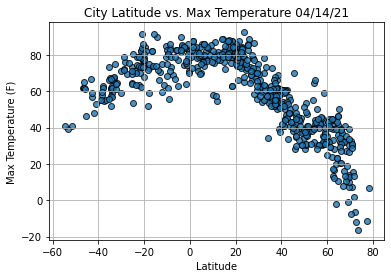

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

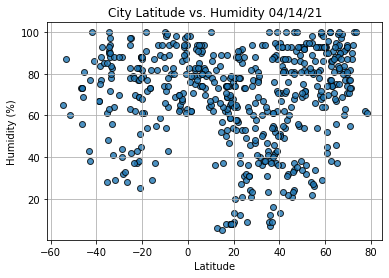

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

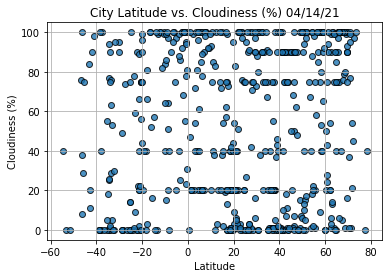

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

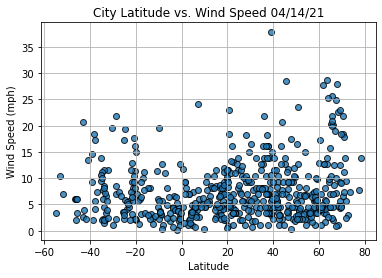

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [50]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [51]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

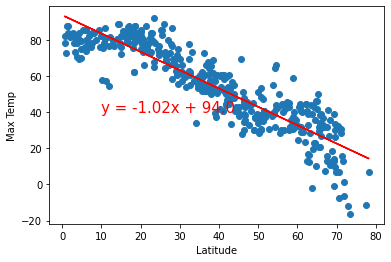

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [53]:
# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

regress_values = r_value
print(regress_values)    

-0.8972654826430692


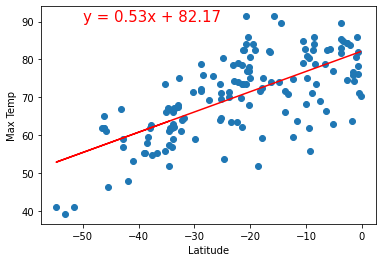

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [55]:
# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

regress_values = r_value
print(regress_values)    

0.6784426295176291


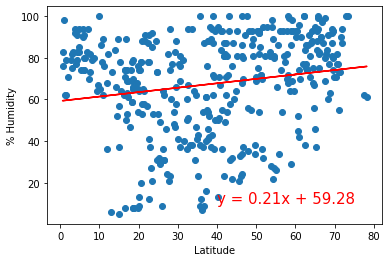

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

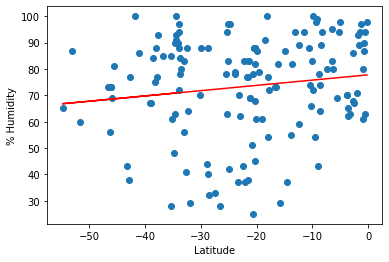

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Humidity', '% Humidity',(-50,15))

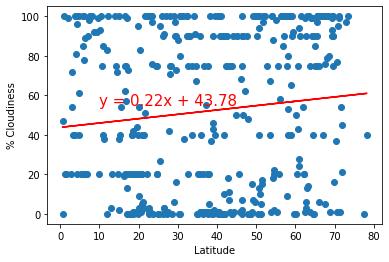

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

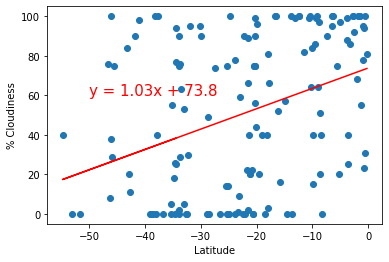

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

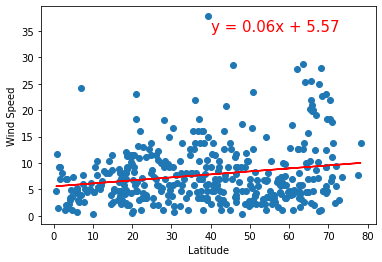

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                        for Wind Speed', 'Wind Speed',(40,35))

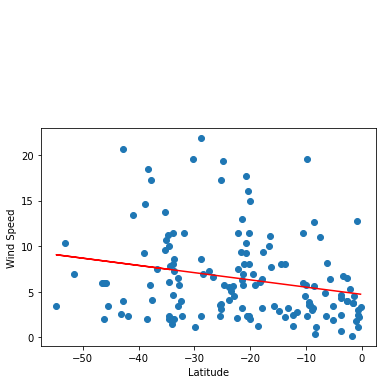

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))